In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Subida de información: (Bases de datos en grupo de 3 años, desde 2010-2024)**

In [3]:
import pandas as pd

#bd = base de datos

bd0 = pd.read_excel("/content/drive/MyDrive/Base de datos/public_emdat_custom_request_2024-11-04_131af490-d94d-4f2f-9bd2-c5bdbd081380.xlsx")
bd = pd.read_excel("/content/drive/MyDrive/Base de datos/2010-2012.xlsx")
bd2 = pd.read_excel("/content/drive/MyDrive/Base de datos/2013-2015.xlsx")
bd3 = pd.read_excel("/content/drive/MyDrive/Base de datos/2016-2018.xlsx")
bd4 = pd.read_excel("/content/drive/MyDrive/Base de datos/2019-2021.xlsx")
bd5 = pd.read_excel("/content/drive/MyDrive/Base de datos/2022-2024.xlsx")



# **0. Subida de datos conforme al estudio de inundaciones y sus variables a estudiar:**

In [4]:
# 1. Filtrando el tipo de desastre natural a estudiar (Inundaciones = Flood) en cada de una de los DataFrame creados.

df_inundaciones0 = bd0[bd0['Disaster Type'] == 'Flood']
df_inundaciones = bd[bd['Disaster Type'] == 'Flood']
df_inundaciones2 = bd2[bd2['Disaster Type'] == 'Flood']
df_inundaciones3 = bd3[bd3['Disaster Type'] == 'Flood']
df_inundaciones4 = bd4[bd4['Disaster Type'] == 'Flood']
df_inundaciones5 = bd5[bd5['Disaster Type'] == 'Flood']


In [5]:
# 2. Nuevamente Filtrado y asignación multiple a cada de los DataFrame las varaibles con las que se trabajaran.

columnas_relevantes = [
    'Start Year', 'Start Month', 'Start Day',
    'Country', 'Region', 'Location',
    'Total Deaths', 'No. Injured', 'No. Affected',
    'Total Affected', 'Total Damage (\'000 US$)',
    'Magnitude'
]
df_inundaciones0 = df_inundaciones0[columnas_relevantes]

df_inundaciones = df_inundaciones[columnas_relevantes]

df_inundaciones2 = df_inundaciones2[columnas_relevantes]

df_inundaciones3 = df_inundaciones3[columnas_relevantes]

df_inundaciones4 = df_inundaciones4[columnas_relevantes]

df_inundaciones5 = df_inundaciones5[columnas_relevantes]

df_inundaciones0                    # Visualización a través del interprete de Columnas resultantes del 1er DataFrame.


,Start Year,Start Month,Start Day,Country,Region,Location,Total Deaths,No. Injured,No. Affected,Total Affected,Total Damage ('000 US$),Magnitude
6,2010,1.0,NaN,Burundi,Africa,"Gatumba village (Mutimbuzi district, Bujumbura...",NaN,NaN,1000.0,1000.0,NaN,NaN
15,2010,1.0,14.0,Philippines,Asia,"Jabonga, Las Nieves, Santiago areas (Agusan de...",2.0,NaN,40198.0,40198.0,22.0,NaN
16,2010,1.0,18.0,Egypt,Africa,"El Arish 1 district (North Sinai province), Ra...",12.0,NaN,3500.0,3500.0,NaN,226100.0
17,2010,1.0,19.0,Israel,Asia,Southern District province,2.0,NaN,NaN,NaN,NaN,NaN
18,2010,1.0,18.0,State of Palestine,Asia,Khan Yunis province,NaN,NaN,NaN,500.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8381,2024,10.0,4.0,India,Asia,Meghalaya,15.0,NaN,NaN,NaN,NaN,NaN
8393,2024,10.0,17.0,France,Europe,"Rhône, Loire, Haute-Loire, Lozère, Ardèche, Al...",NaN,NaN,2485.0,2485.0,NaN,NaN
8394,2024,9.0,23.0,Sierra Leone,Africa,Bumbuna dam in Bumbuna town (Tonkolili Distric...,NaN,NaN,23596.0,23596.0,NaN,NaN
8399,2024,10.0,22.0,South Africa,Africa,Eastern Cape province,10.0,NaN,3000.0,3090.0,NaN,NaN


# 1. Filtrado y Agrupado específico de información:

**Relación entre la Magnitud de la inundación y Daños económicos totales, medidos en miles de dolares, parte 1: 2010-2012.**

In [ ]:
filtro = df_inundaciones[df_inundaciones["Magnitude"]>0]


df_0 = filtro[filtro.columns[0]]
df_1 = filtro[filtro.columns[1]]
df_2 = filtro[filtro.columns[2]]
df_3 = filtro[filtro.columns[3]]
df_4 = filtro[filtro.columns[10]]
df_5 = filtro[filtro.columns[11]]


diccionario = {"Año":df_0, "Mes":df_1, "Dia":df_2, "País":df_3, "Daños Económicos":df_4,"Magnitud":df_5}

nw = pd.DataFrame(diccionario)

limpiar = nw.dropna().copy()


limpiar['Mes'] = limpiar['Mes'].astype(int)
limpiar['Dia'] = limpiar['Dia'].astype(int)

limpiar["Fecha"] = pd.to_datetime(limpiar[["Año", "Mes", "Dia"]].astype(str).agg('-'.join, axis=1))


limpiar.drop(columns=["Año", "Mes", "Dia"], inplace=True)

limpiar = limpiar.reset_index(drop=True)

limpiar


,País,Daños Económicos,Magnitud,Fecha
0,Mexico,16000.0,122621.0,2010-01-26
1,Portugal,1350000.0,483.0,2010-02-20
2,Australia,109000.0,431681.0,2010-02-28
3,Colombia,1000000.0,1140146.0,2010-04-06
4,Sri Lanka,105000.0,19210.0,2010-05-14
...,...,...,...,...
62,India,98000.0,42597.0,2012-09-19
63,United Kingdom of Great Britain and Northern I...,81000.0,8507.0,2012-09-23
64,South Africa,200000.0,14489.0,2012-10-24
65,China,600000.0,92141.0,2012-07-09


**Relación Daños Económicos y Magnitud, parte 2: 2013-2015**

In [ ]:
filtro2 = df_inundaciones2[df_inundaciones2["Start Year"] > 2012 ]

df_filtro2 = filtro2.iloc[:, [0, 1, 2, 3, 10, 11]]

df_filtro2 = df_filtro2.rename(columns = {"Start Year":"Año","Start Month":"Mes", "Start Day":"Day", "Country":"País", "Total Damage ('000 US$)":"Daños Económicos", "Magnitude":"Magnitud"})

limpiar2 = df_filtro2.dropna().copy()

limpiar2['Mes'] = limpiar2['Mes'].astype(int)
limpiar2['Day'] = limpiar2['Day'].astype(int)

limpiar2["Fecha"] = pd.to_datetime(limpiar2[["Año", "Mes", "Day"]].astype(str).agg('-'.join, axis=1))

limpiar2 = limpiar2.drop(columns=["Año", "Mes", "Day"])


limpiar2 = limpiar2.reset_index(drop=True)


limpiar2

,País,Daños Económicos,Magnitud,Fecha
0,Indonesia,3000000.0,1746.00,2013-01-17
1,Indonesia,2000.0,28873.67,2013-02-15
2,Mauritius,2000.0,1679.67,2013-03-30
3,Argentina,1300000.0,18135.40,2013-04-01
4,Kenya,36000.0,73170.41,2013-03-10
...,...,...,...,...
58,Myanmar,119000.0,26424.00,2015-07-15
59,North Macedonia,87000.0,5957.41,2015-08-03
60,Nigeria,25000.0,186816.02,2015-09-05
61,France,924000.0,2895.95,2015-10-03


**Relación Daños Económicos y Magnitud, parte 3: 2016-2019**

In [7]:
filtro3 = df_inundaciones3[df_inundaciones3["Start Year"] > 2015 ]

df_filtro3 = filtro3.iloc[:, [0, 1, 2, 3, 10, 11]]

df_filtro3 = df_filtro3.rename(columns = {"Start Year":"Año","Start Month":"Mes", "Start Day":"Day", "Country":"País", "Total Damage ('000 US$)":"Daños Económicos", "Magnitude":"Magnitud"})

limpiar3 = df_filtro3.dropna().copy()

limpiar3['Mes'] = limpiar3['Mes'].astype(int)
limpiar3['Day'] = limpiar3['Day'].astype(int)

limpiar3["Fecha"] = pd.to_datetime(limpiar3[["Año", "Mes", "Day"]].astype(str).agg('-'.join, axis=1))

limpiar3 = limpiar3.drop(columns=["Año", "Mes", "Day"])


limpiar3 = limpiar3.reset_index(drop=True)


limpiar3.head(10)


,País,Daños Económicos,Magnitud,Fecha
0,Ecuador,10000.0,69541.98,2016-01-01
1,Brazil,100000.0,110514.83,2016-01-09
2,Indonesia,2000.0,235818.78,2016-02-07
3,China,170000.0,383223.81,2016-03-19
4,New Zealand,25000.0,39333.76,2016-03-23
5,Uruguay,3000.0,126653.11,2016-04-12
6,Russian Federation,2000.0,1834048.30,2016-04-16
7,India,150000.0,70517.68,2016-04-22
8,Germany,2000000.0,91554.92,2016-05-31
9,China,3000000.0,197079.53,2016-06-18


**Relación Daños Económicos y Magnitud, parte 4: 2019-2021**

In [ ]:
filtro4 = df_inundaciones4[df_inundaciones4["Start Year"] > 2018]

df_filtro4 = filtro4.iloc[:, [0, 1, 2, 3, 10, 11]]

df_filtro4 = df_filtro4.rename(columns = {"Start Year":"Año","Start Month":"Mes", "Start Day":"Day", "Country":"País", "Total Damage ('000 US$)":"Daños Económicos", "Magnitude":"Magnitud"})

limpiar4 = df_filtro4.dropna().copy()

limpiar4['Mes'] = limpiar4['Mes'].astype(int)
limpiar4['Day'] = limpiar4['Day'].astype(int)

limpiar4["Fecha"] = pd.to_datetime(limpiar4[["Año", "Mes", "Day"]].astype(str).agg('-'.join, axis=1))

limpiar4 = limpiar4.drop(columns=["Año", "Mes", "Day"])


limpiar4 = limpiar4.reset_index(drop=True)


limpiar4



,País,Daños Económicos,Magnitud,Fecha
0,Spain,58000.0,6802.00,2019-01-22
1,Libya,7100.0,151026.83,2019-05-28
2,Russian Federation,460000.0,413323.05,2019-06-28
3,Japan,100000.0,10883.12,2019-08-27
4,Spain,2500000.0,9114.70,2019-09-11
5,Indonesia,1200000.0,24986.75,2019-12-31
6,Brazil,300000.0,115219.89,2020-01-17
7,Egypt,76000.0,22124.19,2020-03-11
8,Kenya,10000.0,154389.90,2020-04-18
9,Yemen,10000.0,18949.28,2020-04-15


**Relación Daños Económicos y Magnitud, parte 5: 2022-2024**

In [ ]:
filtro5 = df_inundaciones5[df_inundaciones5["Start Year"] > 2021]

df_filtro5 = filtro5.iloc[:, [0, 1, 2, 3, 10, 11]]

df_filtro5 = df_filtro5.rename(columns = {"Start Year":"Año","Start Month":"Mes", "Start Day":"Day", "Country":"País", "Total Damage ('000 US$)":"Daños Económicos", "Magnitude":"Magnitud"})

limpiar5 = df_filtro5.dropna().copy()

limpiar5['Mes'] = limpiar5['Mes'].astype(int)
limpiar5['Day'] = limpiar5['Day'].astype(int)

limpiar5["Fecha"] = pd.to_datetime(limpiar5[["Año", "Mes", "Day"]].astype(str).agg('-'.join, axis=1))

limpiar5 = limpiar5.drop(columns=["Año", "Mes", "Day"])


limpiar5 = limpiar5.reset_index(drop=True)


limpiar5


,País,Daños Económicos,Magnitud,Fecha
0,France,1650000.0,30.0,2023-11-06


**Relación Daños Económicos y Magnitud, totalización de información: 2012-2024**

In [11]:
#filtro5 = df_inundaciones5[df_inundaciones5["Start Year"] > 2021]

df_filtro0 = df_inundaciones0.iloc[:, [0, 1, 2, 3, 10, 11]]

df_filtro0 = df_filtro0.rename(columns = {"Start Year":"Año","Start Month":"Mes", "Start Day":"Day", "Country":"País", "Total Damage ('000 US$)":"Daños Económicos", "Magnitude":"Magnitud"})

limpiar0 = df_filtro0.dropna().copy()

limpiar0['Mes'] = limpiar0['Mes'].astype(int)
limpiar0['Day'] = limpiar0['Day'].astype(int)

limpiar0["Fecha"] = pd.to_datetime(limpiar0[["Año", "Mes", "Day"]].astype(str).agg('-'.join, axis=1))

limpiar0 = limpiar0.drop(columns=["Año", "Mes", "Day"])

limpiar0 = limpiar0.reset_index(drop=True)

limpiar0

,País,Daños Económicos,Magnitud,Fecha
0,Mexico,16000.0,122621.00,2010-01-26
1,Portugal,1350000.0,483.00,2010-02-20
2,Australia,109000.0,431681.00,2010-02-28
3,Colombia,1000000.0,1140146.00,2010-04-06
4,Sri Lanka,105000.0,19210.00,2010-05-14
...,...,...,...,...
187,Yemen,10000.0,18949.28,2020-04-15
188,Ukraine,153861.0,33791.16,2020-06-22
189,Japan,5800000.0,28547.82,2020-06-29
190,Germany,40000000.0,8488.83,2021-07-12


# 2. Procesamiento de datos:

**Estadísticas de Daños Económicos y Magnitud de Desastres Naturales (2010-2024) reflejado en plazos de 3 años.**

In [ ]:
print("Plazo 2010-2012")

limpiar.describe()

Plazo 2010-2012


,Daños Económicos,Magnitud,Fecha
count,67.00,67.00,67
mean,"1,240,460.97","182,859.06",2011-06-30 15:45:40.298507520
min,176.00,483.00,2010-01-26 00:00:00
25%,"21,000.00","19,075.00",2010-11-20 00:00:00
50%,"110,000.00","42,597.00",2011-06-01 00:00:00
75%,"389,500.00","126,259.50",2012-04-20 00:00:00
max,"40,000,000.00","2,643,786.00",2012-12-17 00:00:00
std,"5,079,718.01","402,579.17",NaN


In [ ]:
print("Plazo 2013-2015")

limpiar2.describe()

Plazo 2013-2015


,Daños Económicos,Magnitud,Fecha
count,63.00,63.00,63
mean,"859,418.90","180,318.60",2014-04-28 17:08:34.285714176
min,791.00,830.23,2013-01-17 00:00:00
25%,"11,500.00","19,641.70",2013-08-10 00:00:00
50%,"163,000.00","61,894.97",2014-04-01 00:00:00
75%,"852,000.00","247,444.85",2014-12-15 12:00:00
max,"12,900,000.00","1,829,701.00",2015-11-08 00:00:00
std,"1,894,228.88","298,061.68",NaN


In [ ]:
print("Plazo 2016-2018")

limpiar3.describe()

Plazo 2016-2018


,Daños Económicos,Magnitud,Fecha
count,48.00,48.00,48
mean,"1,153,418.33","172,100.27",2017-03-12 19:30:00
min,"1,400.00","2,882.25",2016-01-01 00:00:00
25%,"24,250.00","31,097.10",2016-07-13 18:00:00
50%,"100,000.00","70,029.83",2016-12-29 00:00:00
75%,"294,500.00","149,185.88",2017-10-22 18:00:00
max,"22,000,000.00","1,834,048.30",2018-10-09 00:00:00
std,"3,676,956.77","302,795.16",NaN


In [ ]:
print("Plazo 2019 - 2021")

limpiar4.describe()

Plazo 2019 - 2021


,Daños Económicos,Magnitud,Fecha
count,13.00,13.00,13
mean,"3,898,073.92","76,742.12",2020-01-18 00:00:00
min,"7,100.00","6,802.00",2019-01-22 00:00:00
25%,"58,000.00","10,883.12",2019-08-27 00:00:00
50%,"153,861.00","24,986.75",2020-01-17 00:00:00
75%,"1,200,000.00","115,219.89",2020-04-18 00:00:00
max,"40,000,000.00","413,323.05",2021-07-12 00:00:00
std,"10,970,186.57","114,726.08",NaN


In [ ]:
print("Plazo 2022-2024")

limpiar5.describe()

Plazo 2022-2024


,Daños Económicos,Magnitud,Fecha
count,1.00,1.00,1
mean,"1,650,000.00",30.00,2023-11-06 00:00:00
min,"1,650,000.00",30.00,2023-11-06 00:00:00
25%,"1,650,000.00",30.00,2023-11-06 00:00:00
50%,"1,650,000.00",30.00,2023-11-06 00:00:00
75%,"1,650,000.00",30.00,2023-11-06 00:00:00
max,"1,650,000.00",30.00,2023-11-06 00:00:00
std,NaN,NaN,NaN


**Estadísticas totales: 2010-2024**

In [12]:
limpiar0.describe()

,Daños Económicos,Magnitud,Fecha
count,1.920000e+02,1.920000e+02,192
mean,1.275746e+06,1.711985e+05,2014-06-29 03:22:30
min,1.760000e+02,3.000000e+01,2010-01-26 00:00:00
25%,2.150000e+04,2.034551e+04,2012-03-19 00:00:00
50%,1.195000e+05,5.371097e+04,2014-01-29 00:00:00
75%,5.905000e+05,1.518676e+05,2016-08-15 18:00:00
max,4.000000e+07,2.643786e+06,2023-11-06 00:00:00
std,4.636715e+06,3.302510e+05,NaN


# 3. Visualización de los datos, Analisis de la información:

In [ ]:
print("Cantidad de afectaciones por país, plazo de tiempo 2010-2012\n")

print(limpiar0['País'].value_counts())



Cantidad de afectaciones por país, plazo de tiempo 2010-2012

País
India                               17
China                               14
Thailand                             9
Philippines                          8
Indonesia                            7
                                    ..
Sudan                                1
Romania                              1
Saint Vincent and the Grenadines     1
Burundi                              1
Yemen                                1
Name: count, Length: 71, dtype: int64


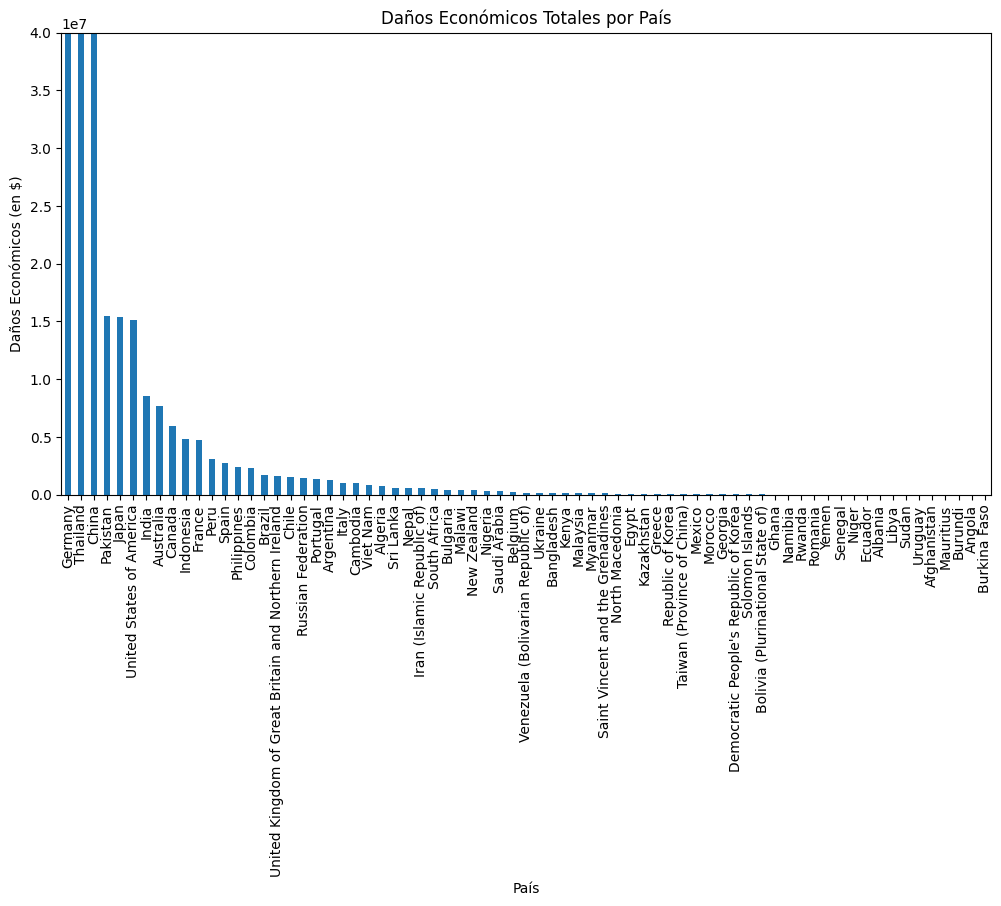

In [15]:
import matplotlib.pyplot as plt

# Ordenar los datos de forma descendente
daños_por_país = limpiar0.groupby('País')['Daños Económicos'].sum().sort_values(ascending=False)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
daños_por_país.plot(kind='bar', ax=ax)

# Personalizar el gráfico
ax.set_title('Daños Económicos Totales por País')
ax.set_xlabel('País')
ax.set_ylabel('Daños Económicos (en $)')
ax.set_ylim(0, limpiar0['Daños Económicos'].max())
ax.tick_params(axis='x', rotation=90)

# Mostrar el gráfico
plt.show()


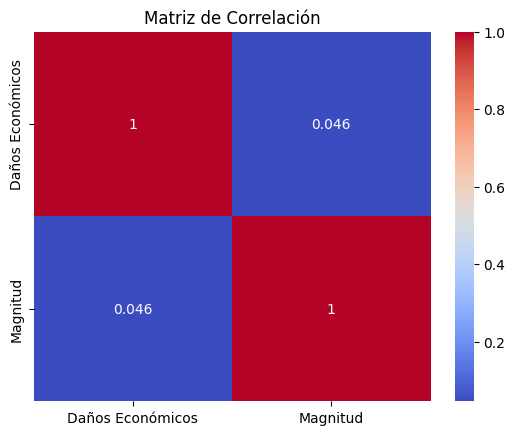

In [17]:
import seaborn as sns
# Matriz de correlación
correlación = limpiar0[['Daños Económicos', 'Magnitud']].corr()
sns.heatmap(correlación, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

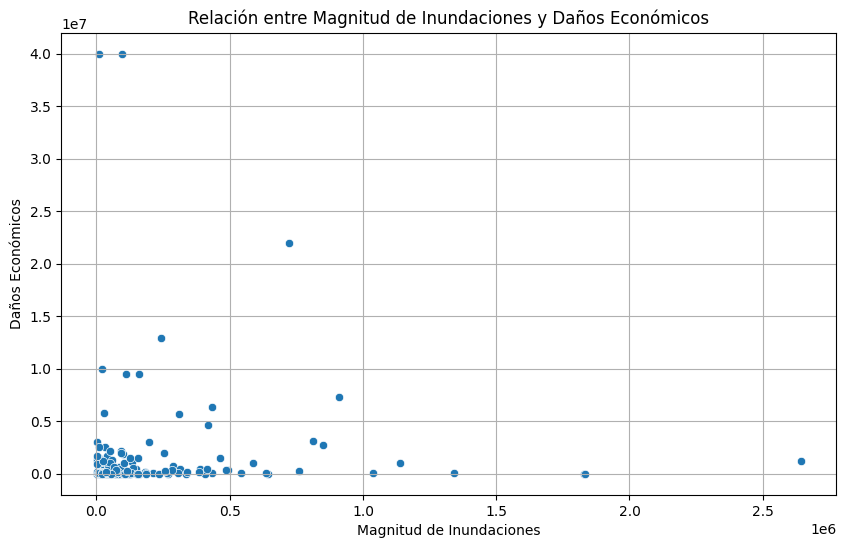

In [ ]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=limpiar0, x='Magnitud', y='Daños Económicos')
plt.title('Relación entre Magnitud de Inundaciones y Daños Económicos')
plt.xlabel('Magnitud de Inundaciones')
plt.ylabel('Daños Económicos')
plt.grid()
plt.show()

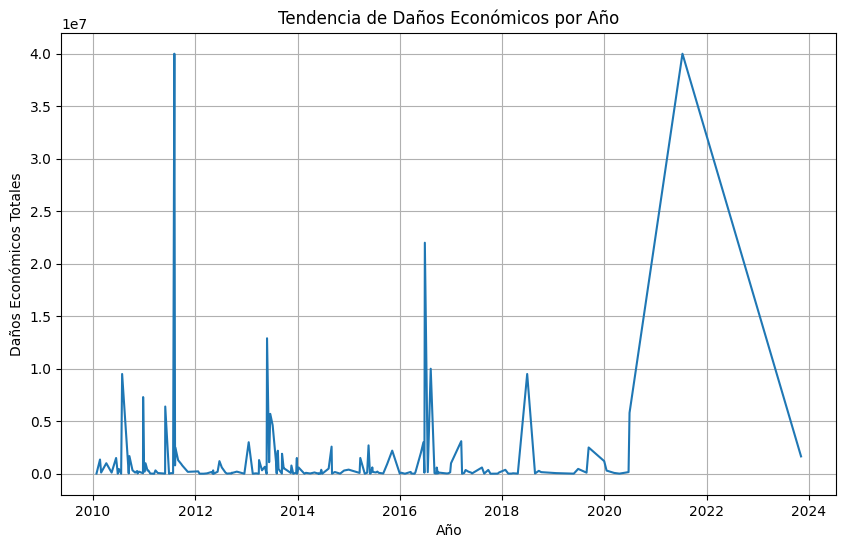

In [ ]:
# Agrupar por año y sumar los daños económicos
tendencias = limpiar0.groupby("Fecha")["Daños Económicos"].sum().reset_index()

# Gráfico de series temporales
plt.figure(figsize=(10, 6))
sns.lineplot(data=tendencias, x='Fecha', y='Daños Económicos')
plt.title('Tendencia de Daños Económicos por Año')
plt.xlabel('Año')
plt.ylabel('Daños Económicos Totales')
plt.grid()
plt.show()

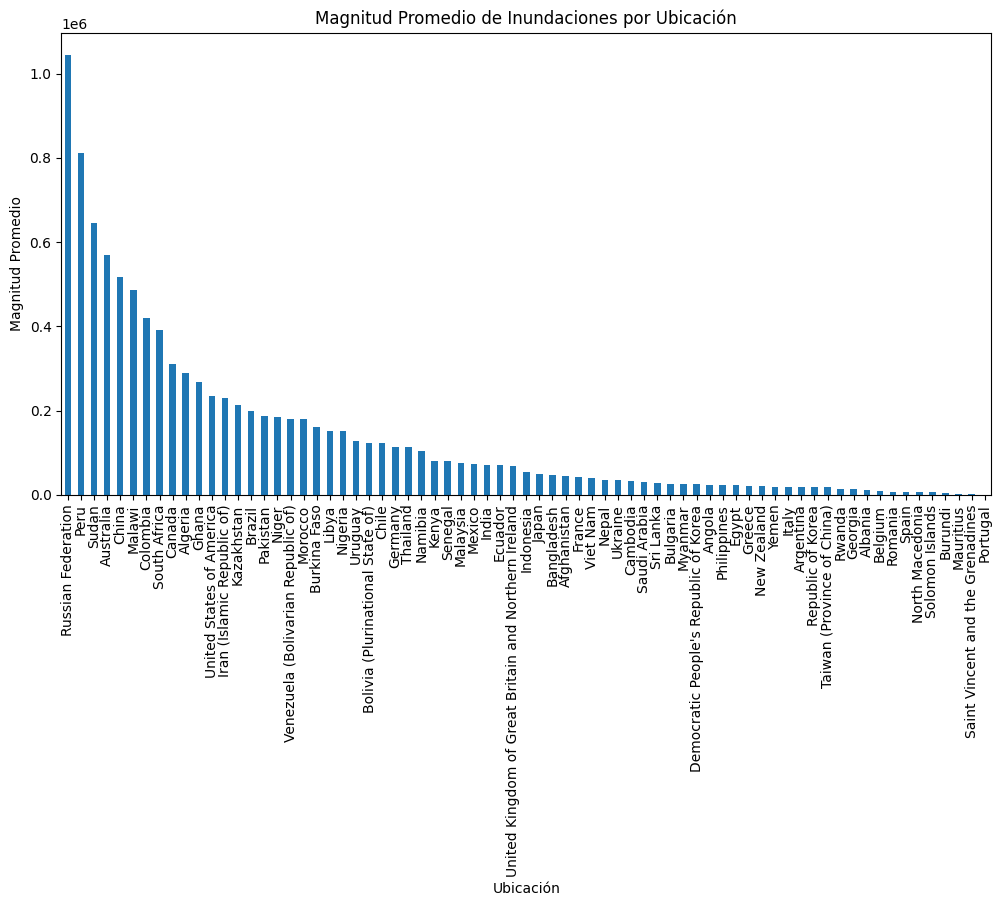

In [24]:
# Agrupar los datos por ubicación y calcular la media de la magnitud
df_ubicacion = limpiar0.groupby('País')['Magnitud'].mean().sort_values(ascending=False)

# Crear un gráfico para visualizar las ubicaciones con mayor magnitud promedio
plt.figure(figsize=(12, 6))
df_ubicacion.plot(kind='bar')
plt.title('Magnitud Promedio de Inundaciones por Ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Magnitud Promedio')
plt.xticks(rotation=90)
plt.show()

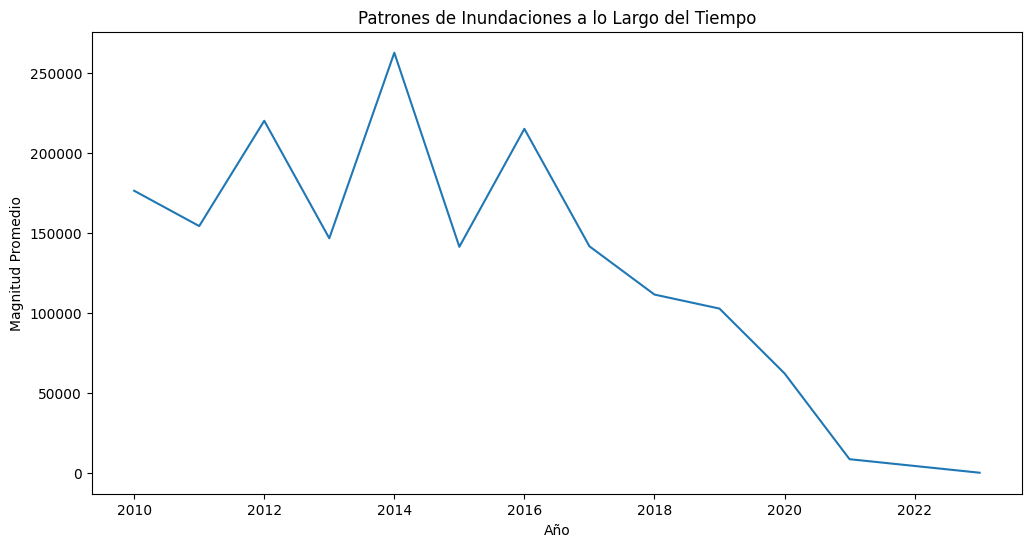

In [21]:
# Agrupar los datos por año y calcular la media de la magnitud
anual = limpiar0.groupby(limpiar0['Fecha'].dt.year)['Magnitud'].mean().reset_index()

# Crear un gráfico para visualizar los patrones a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fecha', y='Magnitud', data=anual)
plt.title('Patrones de Inundaciones a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Magnitud Promedio')
plt.show()